# Análise Exploratória de Dados

**Objetivo**: Limpeza e tratamento de dados

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando os dados
df = pd.read_csv('../datasets/tempo.csv', sep=';', encoding='iso-8859-1')

## exploração

In [49]:
# conhecendo os dados
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [50]:
# conhecendo o shape
df.shape

(14, 5)

In [51]:
# conhecendo o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes


In [52]:
# conhecendo tipos de dados
df.dtypes

Aparencia       object
Temperatura      int64
Umidade        float64
Vento           object
Jogar           object
dtype: object

In [53]:
# conhecendo os dados faltantes
df.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [54]:
# analise estatistica
df.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


## atributos

### categoricos


Contagem de valores únicos: 
Aparencia
sol        5
chuva      5
nublado    3
menos      1
Name: count, dtype: int64


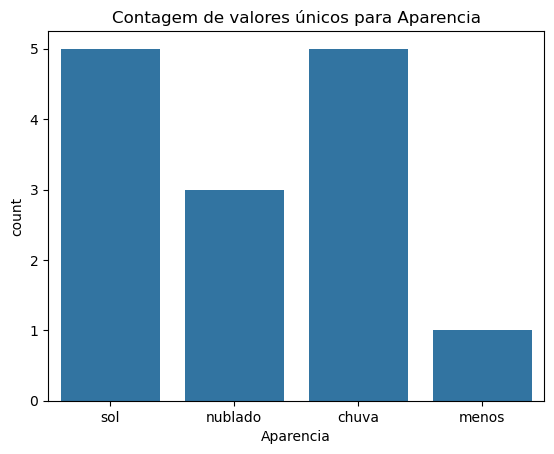


Contagem de valores únicos: 
Vento
FALSO         7
VERDADEIRO    6
NaN           1
Name: count, dtype: int64


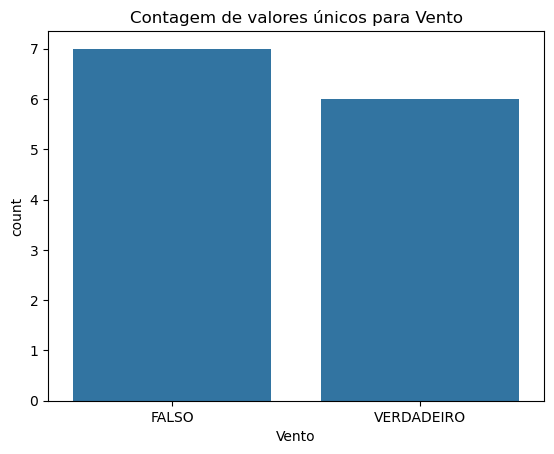


Contagem de valores únicos: 
Jogar
sim    9
nao    5
Name: count, dtype: int64


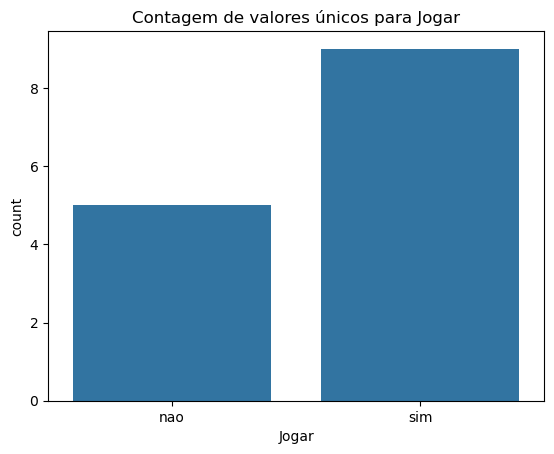

In [55]:
# conhecendo os valores unicos
for col in df.select_dtypes(include=['object']).columns:
    print(f'\nContagem de valores únicos: \n{df[col].value_counts(dropna=False)}')
    sns.countplot(data=df, x=col).set_title(f'Contagem de valores únicos para {col}');
    plt.show()

### numericos

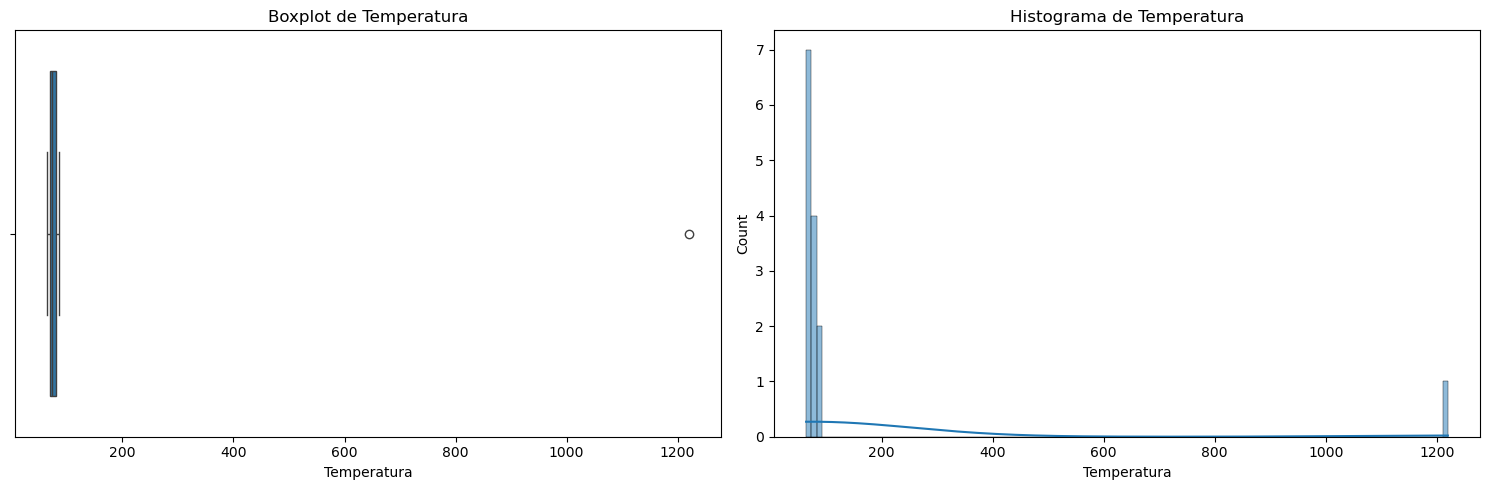

Resumo estatístico para Temperatura:
count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64


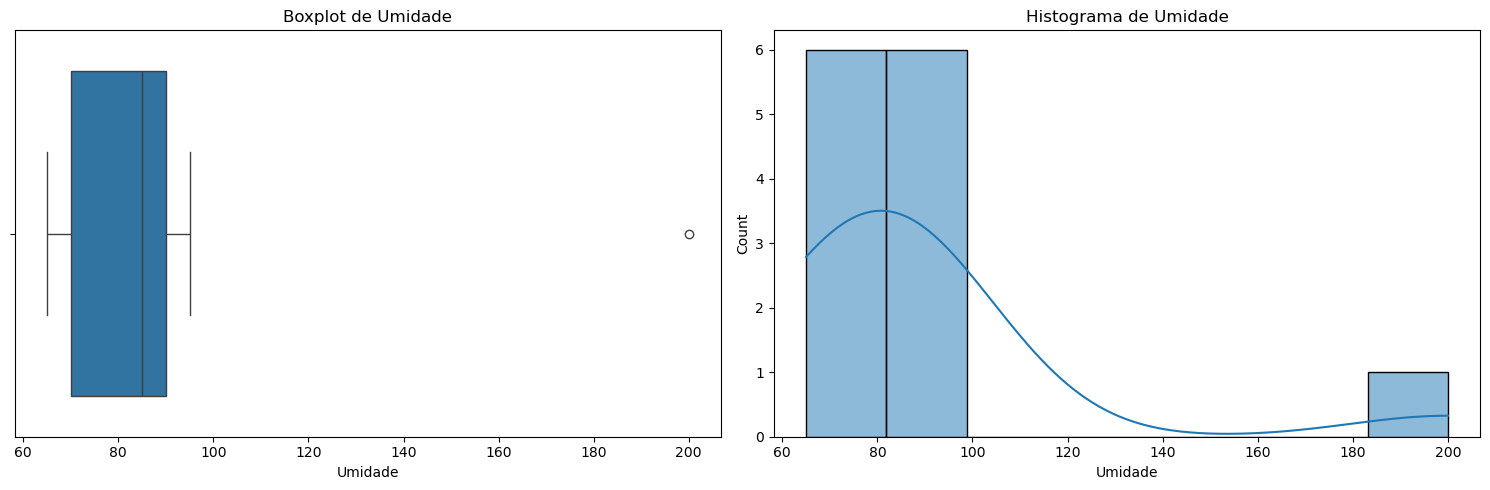

Resumo estatístico para Umidade:
count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64


In [56]:
# visualizando os dados
for col in df.select_dtypes(include=np.number).columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x=df[col], ax=ax[0]).set_title(f'Boxplot de {col}')
    sns.histplot(x=df[col],kde=True, ax=ax[1]).set_title(f'Histograma de {col}')
    plt.tight_layout()
    plt.show()
    print(f'Resumo estatístico para {col}:\n{df[col].describe()}')

## tratamento 

**Regras de negócio:**
- Aparencia: sol, chuva, nublado
- Temperatura: -130 a 130
- Umidade: 0 a 100

In [13]:
# dataframe copia
df2 = df.copy()

### aparencia

In [14]:
print(f'Valores únicos antes do tratamento: {df2["Aparencia"].unique()}')
print(f'Valores faltantes antes do tratamento: {df2.Aparencia.isna().sum()}')

Valores únicos antes do tratamento: ['sol' 'nublado' 'chuva' 'menos']
Valores faltantes antes do tratamento: 0


In [15]:
# substituindo valores fora de dominio pela moda
df2['Aparencia'] = df2['Aparencia'].replace('menos', df2['Aparencia'].mode()[0])
print(f'Valores únicos depois do tratamento: {df2["Aparencia"].unique()}')

Valores únicos depois do tratamento: ['sol' 'nublado' 'chuva']


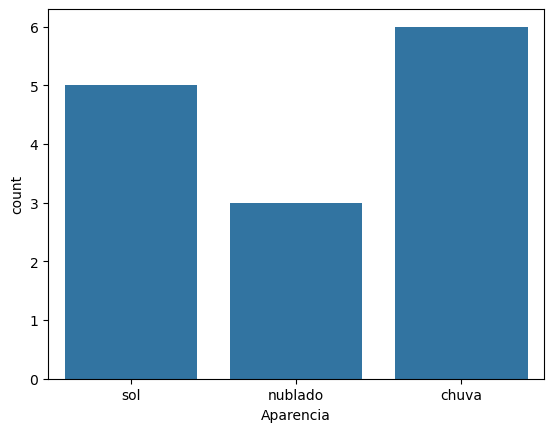

In [16]:
# visualizando
sns.countplot(x='Aparencia', data=df2);

### temperatura

In [17]:
print(f'Valores faltantes depois do tratamento: {df2.Temperatura.isna().sum()}')
print(f'Valores fora do domínio antes do tratamento: {df2.query('Temperatura <= -130 | Temperatura >= 130')['Temperatura'].count()} ')

Valores faltantes depois do tratamento: 0
Valores fora do domínio antes do tratamento: 1 


In [18]:
# substituindo valores fora de dominio pela mediana
df2.Temperatura = df2.Temperatura.astype(float)

df2.loc[(df2['Temperatura'] <= -130) | (df2['Temperatura'] >= 130), 'Temperatura']= df2['Temperatura'].median()

print(f'Valores fora do domínio depois do tratamento: {df2.query('Temperatura <= -130 | Temperatura >= 130')['Temperatura'].count()} ')

Valores fora do domínio depois do tratamento: 0 


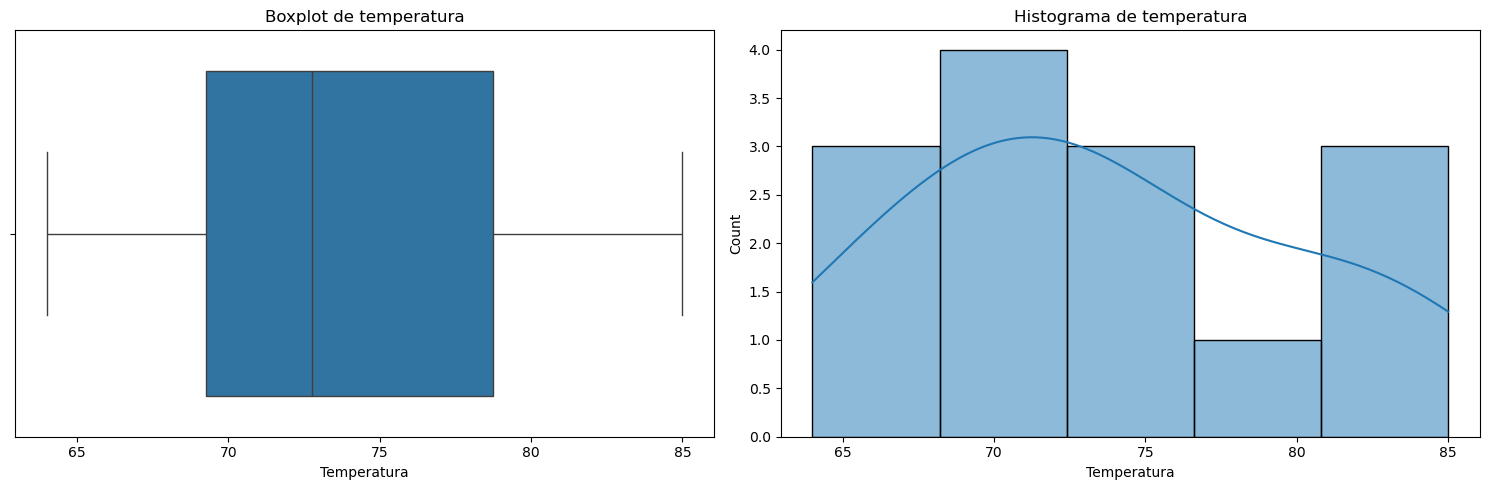

Resumo estatístico para temperatura:
count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64


In [19]:
# visualizando
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df2['Temperatura'], ax=ax[0]).set_title('Boxplot de temperatura')
sns.histplot(x=df2['Temperatura'],kde=True, ax=ax[1]).set_title('Histograma de temperatura')
plt.tight_layout()
plt.show()
print(f'Resumo estatístico para temperatura:\n{df2["Temperatura"].describe()}')

### umidade

In [24]:
print(f'Valores faltantes antes do tratamento: {df2.Umidade.isna().sum()}')
print(f'Valores fora do domínio antes do tratamento: {df2.query("Umidade < 0 | Umidade > 100").Umidade.count()}')

Valores faltantes antes do tratamento: 1
Valores fora do domínio antes do tratamento: 1


In [27]:
# substituindo valores faltantes e valores fora de dominio pela mediana
df2.Umidade = df2.Umidade.fillna(df2.Umidade.median())
df2.loc[(df2['Umidade'] < 0) | (df2['Umidade'] > 100), 'Umidade'] = df2['Umidade'].median()

print(f'Valores faltantes depois do tratamento: {df2.Umidade.isna().sum()}')
print(f'Valores fora do domínio depois do tratamento: {df2.query("Umidade < 0 | Umidade > 100").Umidade.count()}')

Valores faltantes depois do tratamento: 0
Valores fora do domínio depois do tratamento: 0


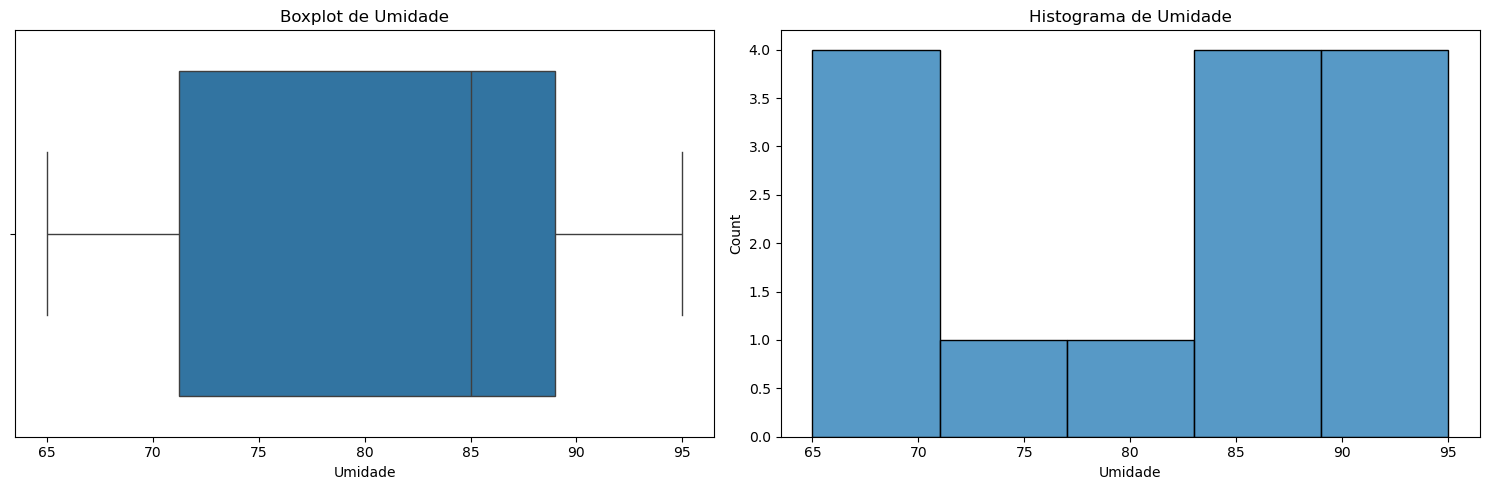

Resumo estatístico para umidade:
count    14.000000
mean     81.214286
std       9.552918
min      65.000000
25%      71.250000
50%      85.000000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64


In [29]:
# visualizando
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x='Umidade', data=df2, ax=ax[0]).set_title('Boxplot de Umidade')
sns.histplot(x='Umidade', data=df2, ax=ax[1]).set_title('Histograma de Umidade')
plt.tight_layout()
plt.show()
print(f'Resumo estatístico para umidade:\n{df2.Umidade.describe()}')

## Reports

### **Resumo de Análise e Tratamento de Dados**

- **Objetivo:** Limpeza de dados para atender às regras de negócio:
  - **Aparência:** Valores válidos: "sol", "chuva", "nublado".
  - **Temperatura:** Entre -130 e 130.
  - **Umidade:** Entre 0 e 100.

- **Dados iniciais:**
  - **Shape:** (14, 5)
  - **Valores faltantes:** `Umidade (1)` e `Vento (1)`.
  - **Fora do domínio:** `Temperatura (1)` e `Umidade (1)`.

- **Tratamentos realizados:**
  1. Substituído `menos` em `Aparência` pela moda (`sol`).
  2. Valores fora do domínio em `Temperatura` e `Umidade` substituídos pela mediana.
  3. Valores ausentes em `Umidade` preenchidos com a mediana.

- **Dados finais:**
  - Sem valores ausentes ou fora do domínio.
  - **Temperatura:** Média: 73.68, Máx: 85.
  - **Umidade:** Média: 81.21, Máx: 95.

- **Visualizações:** Gráficos exploratórios (boxplot, histograma e contagem de valores categóricos).